In [35]:
import pandas as pd
import sys
import os
sys.path.append('../../style')
from style_config import StyleConfig

salaries = pd.read_csv("salaries.csv")
points = pd.read_csv("points.csv")
df = pd.merge(salaries, points, on=["season", "Squad"])

df

,adj_gross_gbp,annual_gross_gbp,club_code,defense_gbp,forward_gbp,keeper_gbp,midfield_gbp,Squad,weekly_gross_gbp,season,MP,W,D,L,GF,GA,GD,Pts
0,147132001,113952000,MCI,40996000,23920000,5616000,43420000,Manchester City,2191385,2013-2014,38,27,5,6,102,37,65,86
1,135743836,105132000,CHE,31980000,42836000,7124000,23192000,Chelsea,2021769,2013-2014,38,25,7,6,71,27,44,82
2,125621023,97292000,MUN,33462000,31694000,6656000,25480000,Manchester United,1871000,2013-2014,38,19,7,12,64,43,21,64
3,95121913,73670800,ARS,16445000,17368000,4492000,35365800,Arsenal,1416746,2013-2014,38,24,7,7,68,41,27,79
4,84652806,65562600,LIV,25033800,20384000,3380000,16764800,Liverpool,1260819,2013-2014,38,26,6,6,101,50,51,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,64142000,64142000,NTG,21164000,20722000,3120000,19136000,Nottingham Forest,1233500,2024-2025,38,19,8,11,58,46,12,65
236,54132000,54132000,SOU,16666000,17186000,9100000,11180000,Southampton,1041000,2024-2025,38,2,6,30,26,86,-60,12
237,53898000,53898000,BOU,14352000,21190000,4316000,14040000,Bournemouth,1036500,2024-2025,38,15,11,12,58,46,12,56
238,44863000,44863000,BTD,17537000,15860000,2600000,8866000,Brentford,862750,2024-2025,38,16,8,14,66,57,9,56


Slope (coefficient): 0.2439
Intercept: 30.7490
R-squared: 0.4635


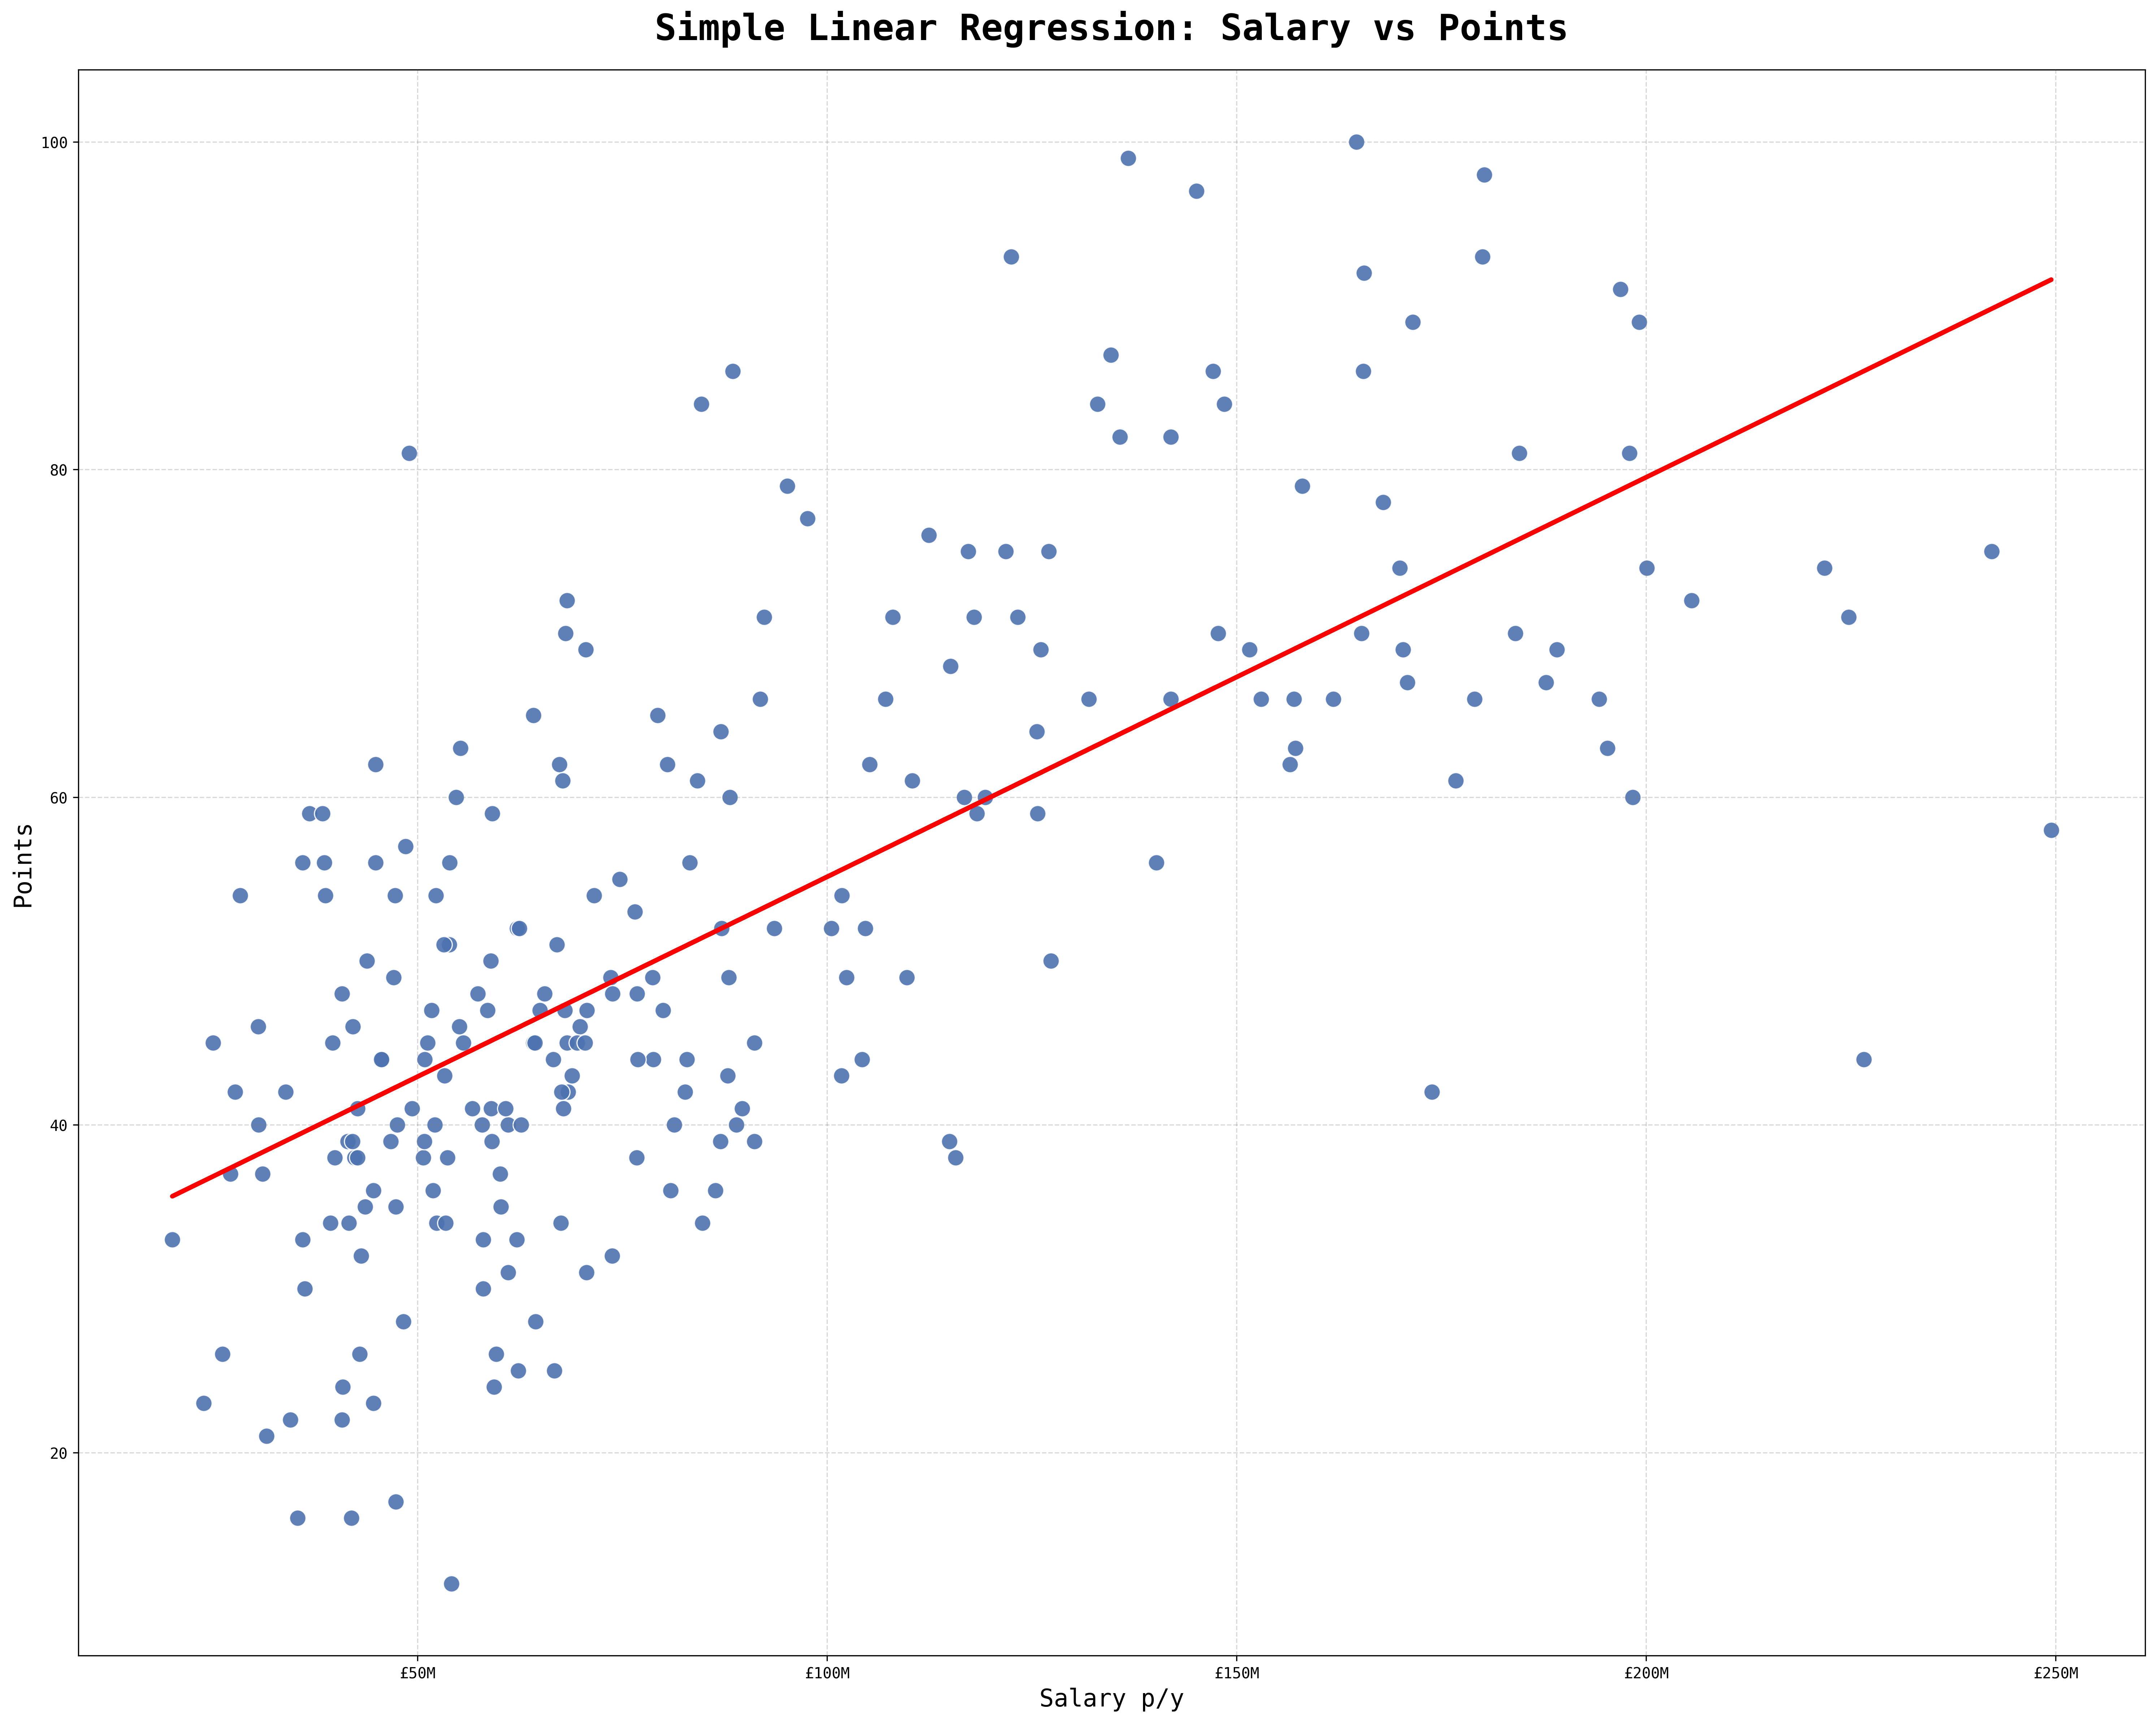

In [36]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Apply your custom styling
StyleConfig.apply_style()

#df = df[df["season"] != '2024-2025']

# Assuming you have your merged dataframe 'df'
X = df[['adj_gross_gbp']]  
X_scaled = df[['adj_gross_gbp']] / 1_000_000
y = df['Pts']

# Create and fit the model
model = LinearRegression()
model.fit(X_scaled, y)

# Make predictions
predictions = model.predict(X_scaled)

# See the results
print(f"Slope (coefficient): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"R-squared: {model.score(X_scaled, y):.4f}")

# Plot it with your custom styling
plt.figure(figsize=StyleConfig.PLOT['figure_size'])

# Scatter plot with styled colors and sizing
plt.scatter(X, y, 
           alpha=StyleConfig.PLOT['alpha'], 
           s=StyleConfig.PLOT['scatter_size'],
           edgecolor=StyleConfig.COLORS['edge_color'],
           linewidth=StyleConfig.PLOT['line_width'],
           color=StyleConfig.get_color_palette(1)[0])

# Regression line
plt.plot(X, predictions, 
         color='red', 
         linewidth=3,
         alpha=1)

# Styled labels and title
plt.xlabel('Salary p/y', 
           fontsize=StyleConfig.FONTS['label_size'],
           family=StyleConfig.FONTS['family'])
plt.ylabel('Points', 
           fontsize=StyleConfig.FONTS['label_size'],
           family=StyleConfig.FONTS['family'])
plt.title('Simple Linear Regression: Salary vs Points', 
          fontsize=StyleConfig.FONTS['title_size'],
          family=StyleConfig.FONTS['family'],
          weight='bold',
          pad=20)

# Add grid with your styling
plt.grid(True, linestyle='--', alpha=0.3, color=StyleConfig.COLORS['grid_color'])

# Format x-axis to show millions
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'£{x/1e6:.0f}M'))

plt.tight_layout()
plt.savefig('salary_vs_points_regression.png', dpi=StyleConfig.PLOT['dpi'], bbox_inches='tight')
plt.show()

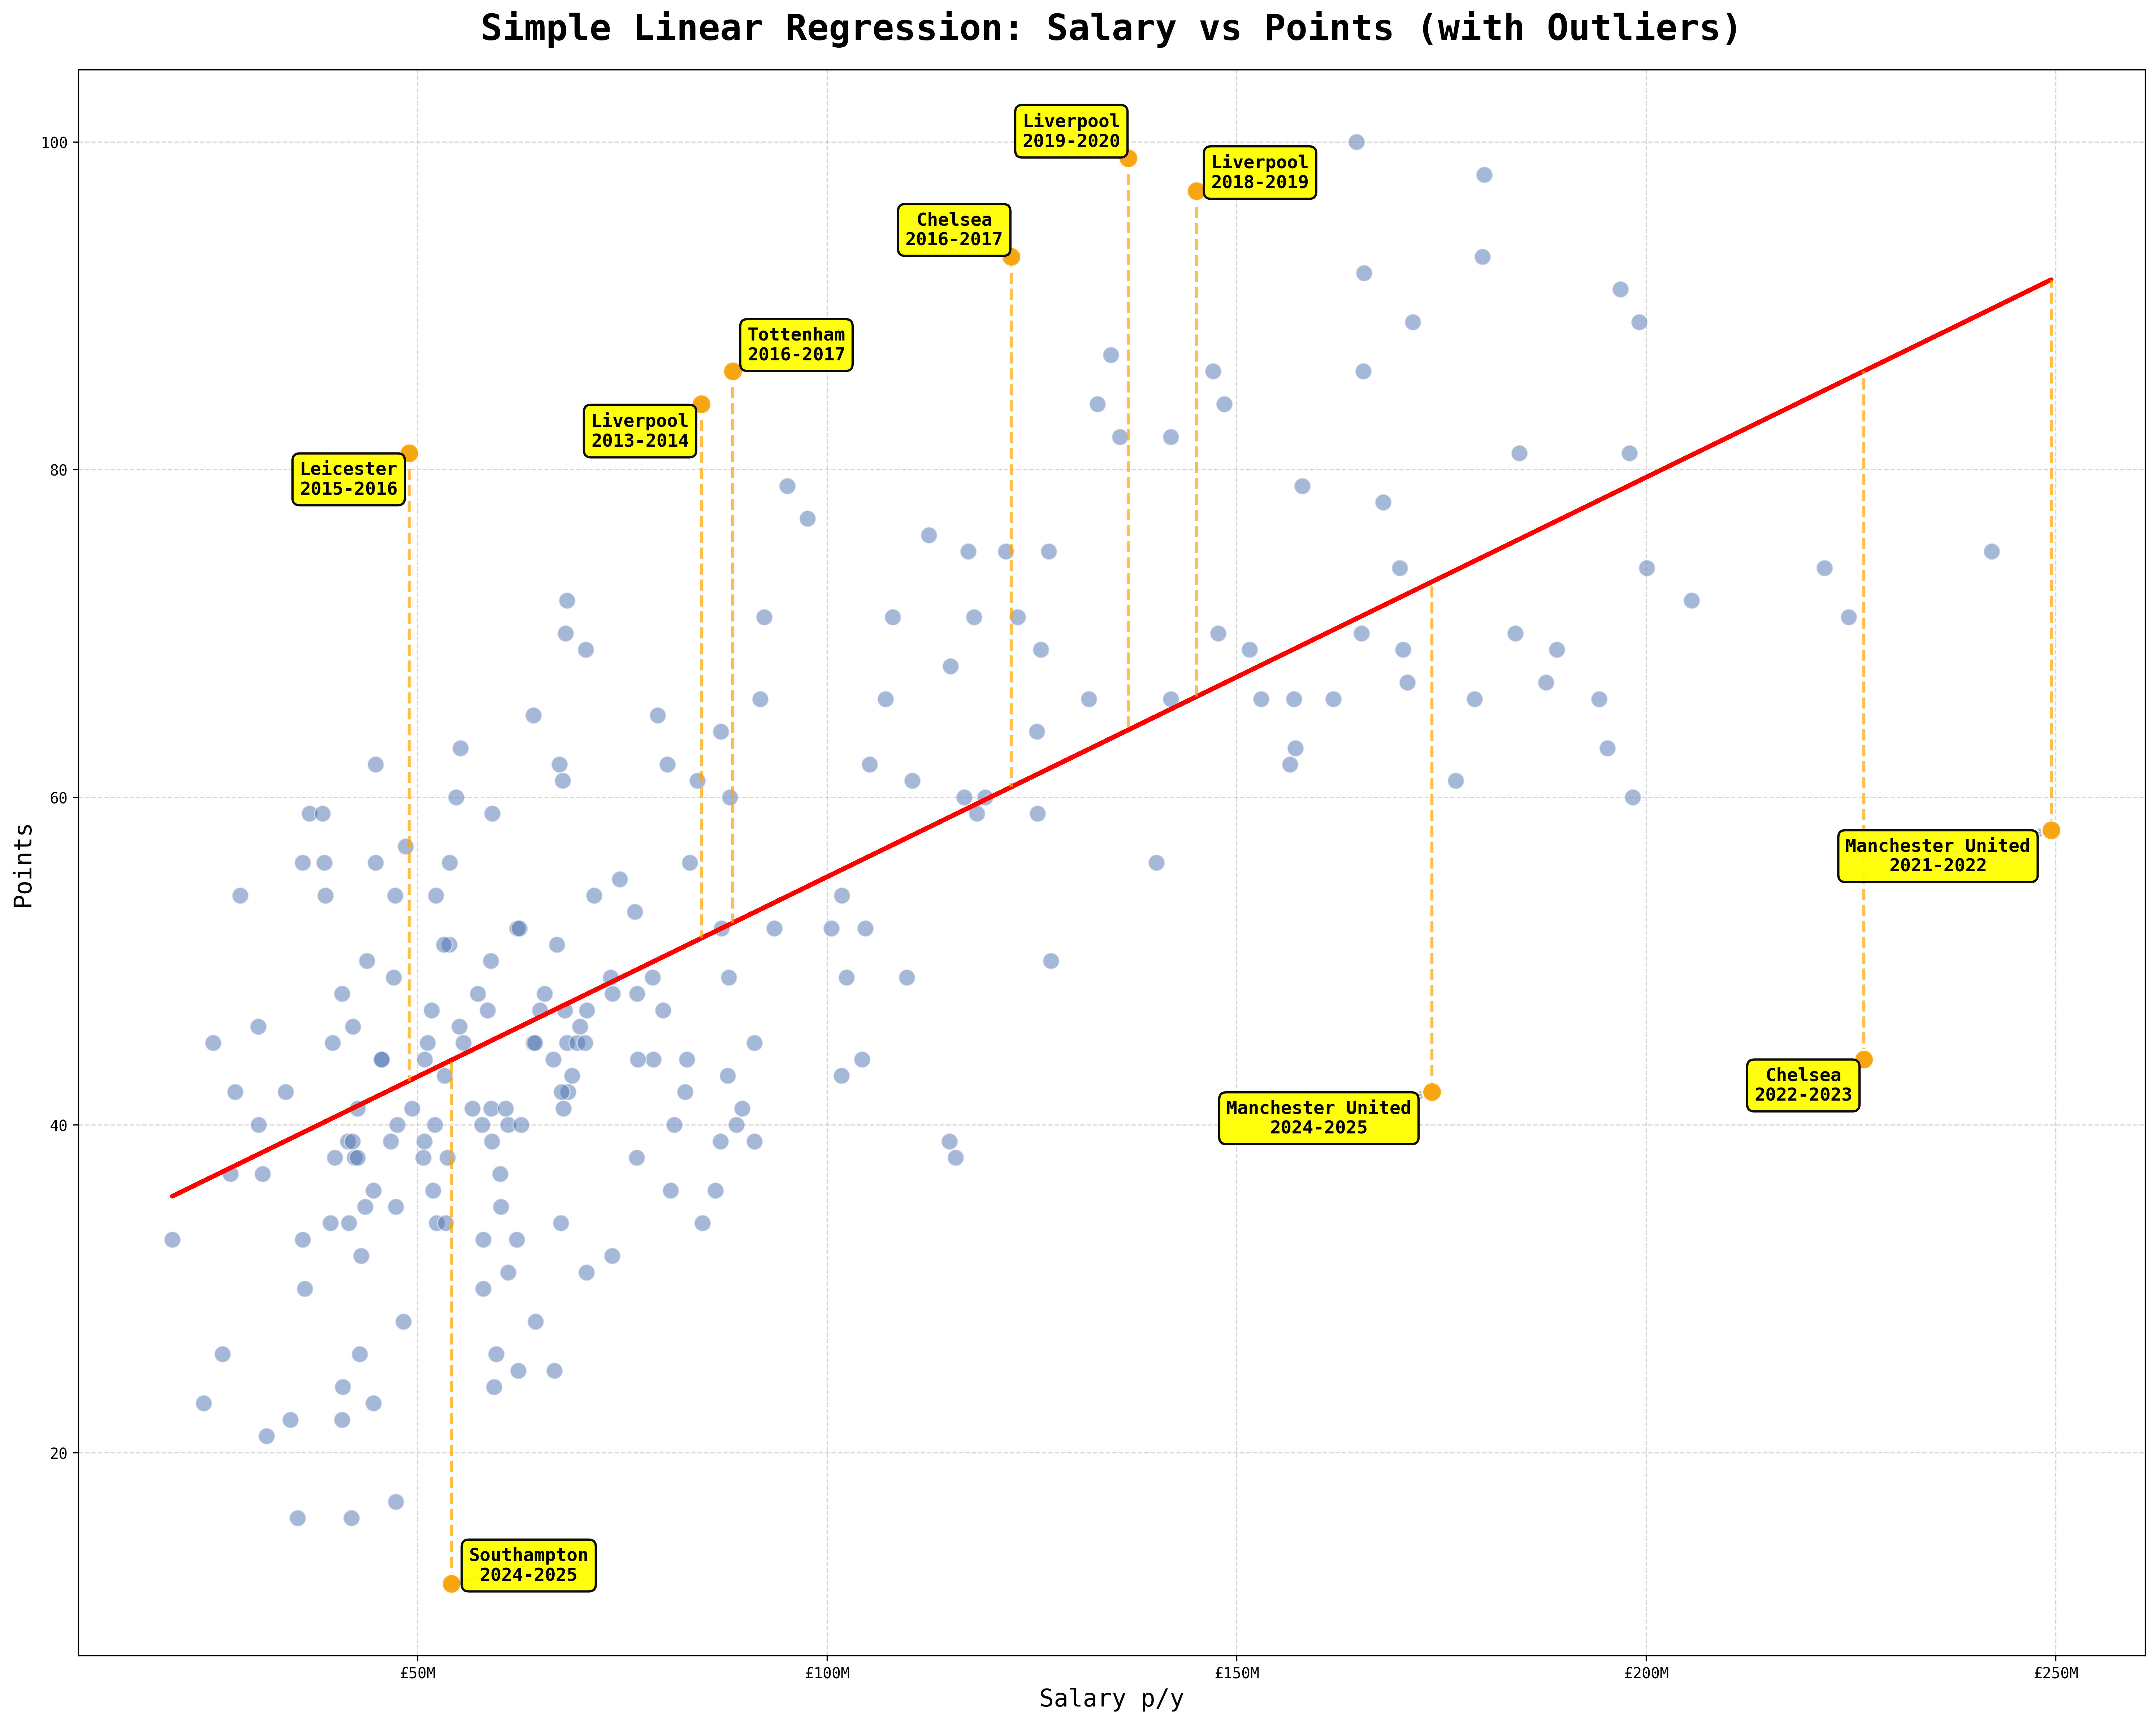

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from adjustText import adjust_text

# Apply your custom styling
StyleConfig.apply_style()

# Your existing model code
X = df[['adj_gross_gbp']]  
y = df['Pts']
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

# Calculate residuals (actual - predicted)
residuals = y - predictions

# Define outliers (you can adjust these thresholds)
residual_threshold = 2.3 * np.std(residuals)  # 2 standard deviations
outliers = np.abs(residuals) > residual_threshold

# Create the plot with styled settings
plt.figure(figsize=StyleConfig.PLOT['figure_size'])

# Main data points with styling
plt.scatter(X, y, 
           alpha=StyleConfig.PLOT['alpha']-0.4,  # Slightly more transparent for main points
           s=StyleConfig.PLOT['scatter_size'],
           edgecolor=StyleConfig.COLORS['edge_color'],
           linewidth=StyleConfig.PLOT['line_width'],
           color=StyleConfig.get_color_palette(3)[0],
           label='Data points')

# Regression line with styling
plt.plot(X, predictions, 
         color='red', 
         linewidth=3, 
         alpha=1,
         label='Regression line')

# ADD RESIDUAL LINES FOR OUTLIERS ONLY
for i, (idx, is_outlier) in enumerate(outliers.items()):
    if is_outlier:
        x_val = X.iloc[i].values[0]
        y_actual = y.iloc[i]
        y_pred = predictions[i]
        
        plt.plot([x_val, x_val], [y_actual, y_pred], 
                color='orange', 
                linestyle='--', 
                linewidth=2, 
                alpha=0.7,
                zorder=3)

# Highlight and label outliers with styled colors
outlier_x = X[outliers]
outlier_y = y[outliers]
scatter_outliers = plt.scatter(outlier_x, outlier_y, 
           color='orange',
           s=StyleConfig.PLOT['scatter_size']+50, 
           alpha=StyleConfig.PLOT['alpha'], 
           edgecolor=StyleConfig.COLORS['edge_color'],
           linewidth=StyleConfig.PLOT['line_width']+0.5,
           label='Outliers',
           zorder=5)  # Ensure outlier dots are on top

# Create a list of all point coordinates (including outliers) for avoidance
all_points_x = X.values.flatten()
all_points_y = y.values

# Labels positioned away from ALL dots
texts = []
for i, (idx, is_outlier) in enumerate(outliers.items()):
    if is_outlier:
        squad = df.loc[idx, 'Squad']
        season = df.loc[idx, 'season']
        
        # Start with the point position but we'll let adjustText move it
        texts.append(plt.text(
            X.iloc[i].values[0], y.iloc[i], 
            f'{squad}\n{season}',
            fontsize=12,
            ha='center',
            va='center',
            family=StyleConfig.FONTS['family'],
            weight='bold',
            bbox=dict(
                boxstyle="round,pad=0.4",
                facecolor='yellow',
                edgecolor='black',
                alpha=0.95,
                linewidth=1.5
            ),
            zorder=6  # Ensure labels are on top
        ))

# Use adjustText with ALL data points to avoid overlap
if texts:
    # Create coordinate arrays for ALL points (not just outliers)
    all_x = X.values.flatten()
    all_y = y.values
    
    adjust_text(
        texts,
        x=all_x, y=all_y,  # Pass ALL points to avoid
        expand_points=(4.0, 4.0),  # Much larger expansion
        force_points=(2.0, 2.0),   # Strong repulsion from ALL points
        force_text=(1.5, 1.5),     # Keep text separation
        arrowprops=dict(
            arrowstyle='->', 
            color='darkgray', 
            lw=1.5, 
            alpha=0.8
        ),
        autoalign='xy',
        only_move={'points':'xy', 'text':'xy'},
        lim=500  # Even more iterations
    )

# Styled labels and title
plt.xlabel('Salary p/y', 
           fontsize=StyleConfig.FONTS['label_size'],
           family=StyleConfig.FONTS['family'])
plt.ylabel('Points', 
           fontsize=StyleConfig.FONTS['label_size'],
           family=StyleConfig.FONTS['family'])
plt.title('Simple Linear Regression: Salary vs Points (with Outliers)', 
          fontsize=StyleConfig.FONTS['title_size'],
          family=StyleConfig.FONTS['family'],
          weight='bold',
          pad=20)

# Add grid with your styling
plt.grid(True, linestyle='--', alpha=0.3, color=StyleConfig.COLORS['grid_color'])

# Format x-axis to show millions
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'£{x/1e6:.0f}M'))

plt.tight_layout()
plt.savefig('salary_vs_points_outliers.png', dpi=StyleConfig.PLOT['dpi'], bbox_inches='tight')
plt.show()